## BSAN 740 TEAM ASSIGNMENT

## **TEAM 7: THE FAST AND FURIOUS** (copyright)

**Group Members:** Jui Nagarkar, Injuu Jyenis, Adawn Symonette, Rochan Peechara, & Rehan Mirza

# **Install & Import**

The following cell needs to be executed every time your open the notebook, or if the notebook gets disconnected (happens if you leave it idle for a while).

In [ ]:
# We will use pulp solver for solving LP problems.

!pip install pulp

# Now that we have installed the solver, the following line imports it, i.e., makes it usable.

from pulp import *

# To perform sensitivity analysis, we will use the GLPK solver.
# Details about this solver can be found here: https://www.gnu.org/software/glpk/

!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 12.6 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpackin

## **TESLA CYBERTRUCK**

The Tesla Cybertruck sales dealership operates two factories: a local factory in Kansas City and an international factory in Taiwan. The local factory has a production capacity of 15,000 trucks, costing 55,000 dollars per truck. The international factory has a capacity of 50,000 trucks, costing 50,000 dollars per truck. The dealership can place orders from these factories up to twice per quarter. Sales are made in 10 key locations across the country:

Los Angeles: 20,000 trucks

San Francisco: 15,000 trucks

Miami: 6,200 trucks

Houston: 3,000 trucks

Austin: 2,200 trucks

Seattle: 4,300 trucks

New York: 3,300 trucks

Phoenix: 2,700 trucks

Denver: 2,400 trucks

Chicago: 2,400 trucks

Each location incurs a holding cost of 37 dollars per day, with trucks being held for a minimum of 30 days and a maximum of 45 days. Additionally, there is a transportation cost of $1.15 per mile. The sales price per truck is 60,000 dollars.

### **Tesla CyberTruck Dealership: Formulation**

**Decision variables**:

(a) Number of trucks delivered from the local factory to location i:&emsp; $L_i$ \

(b) Number of trucks delivered from the international factory to location i:&emsp; $I_i$

(c) Holding time in days for location i:&emsp; $d_i$ \

(d) Distance in miles from each location i:&emsp; $m_{ij}$ \

<br></br>

**Objective**: Maximize profits

$$\text{ Maximize}\ 60000×\sum_{i}(L_i + I_i) -(37 \times d_i \times \sum_{i}(L_i + I_i)) - (1.15\times \sum_{ij} m_{ij}) - (50000\times \sum_{i}I_i + 55000\times\sum_{i}L_i)$$

<br></br>

**Constraints**:

1.  Factory Capacity International: &emsp; $\sum_{i}I_i\le 50000$

2.  Factory Capacity Local: &emsp; $\sum_{i}L_i\le 15000$

3. Demand Satisfaction: &emsp; $L_i + I_i \ge i$

4.  Order Placement: &emsp; 2 orders placed per quarter (can include as many trucks as needed)

5.  Holding days: &emsp; $30 \le d_i \le 45$

6. Non-negativity: &emsp; $I_i, L_i, d_i, m_{ij} \ge 0$

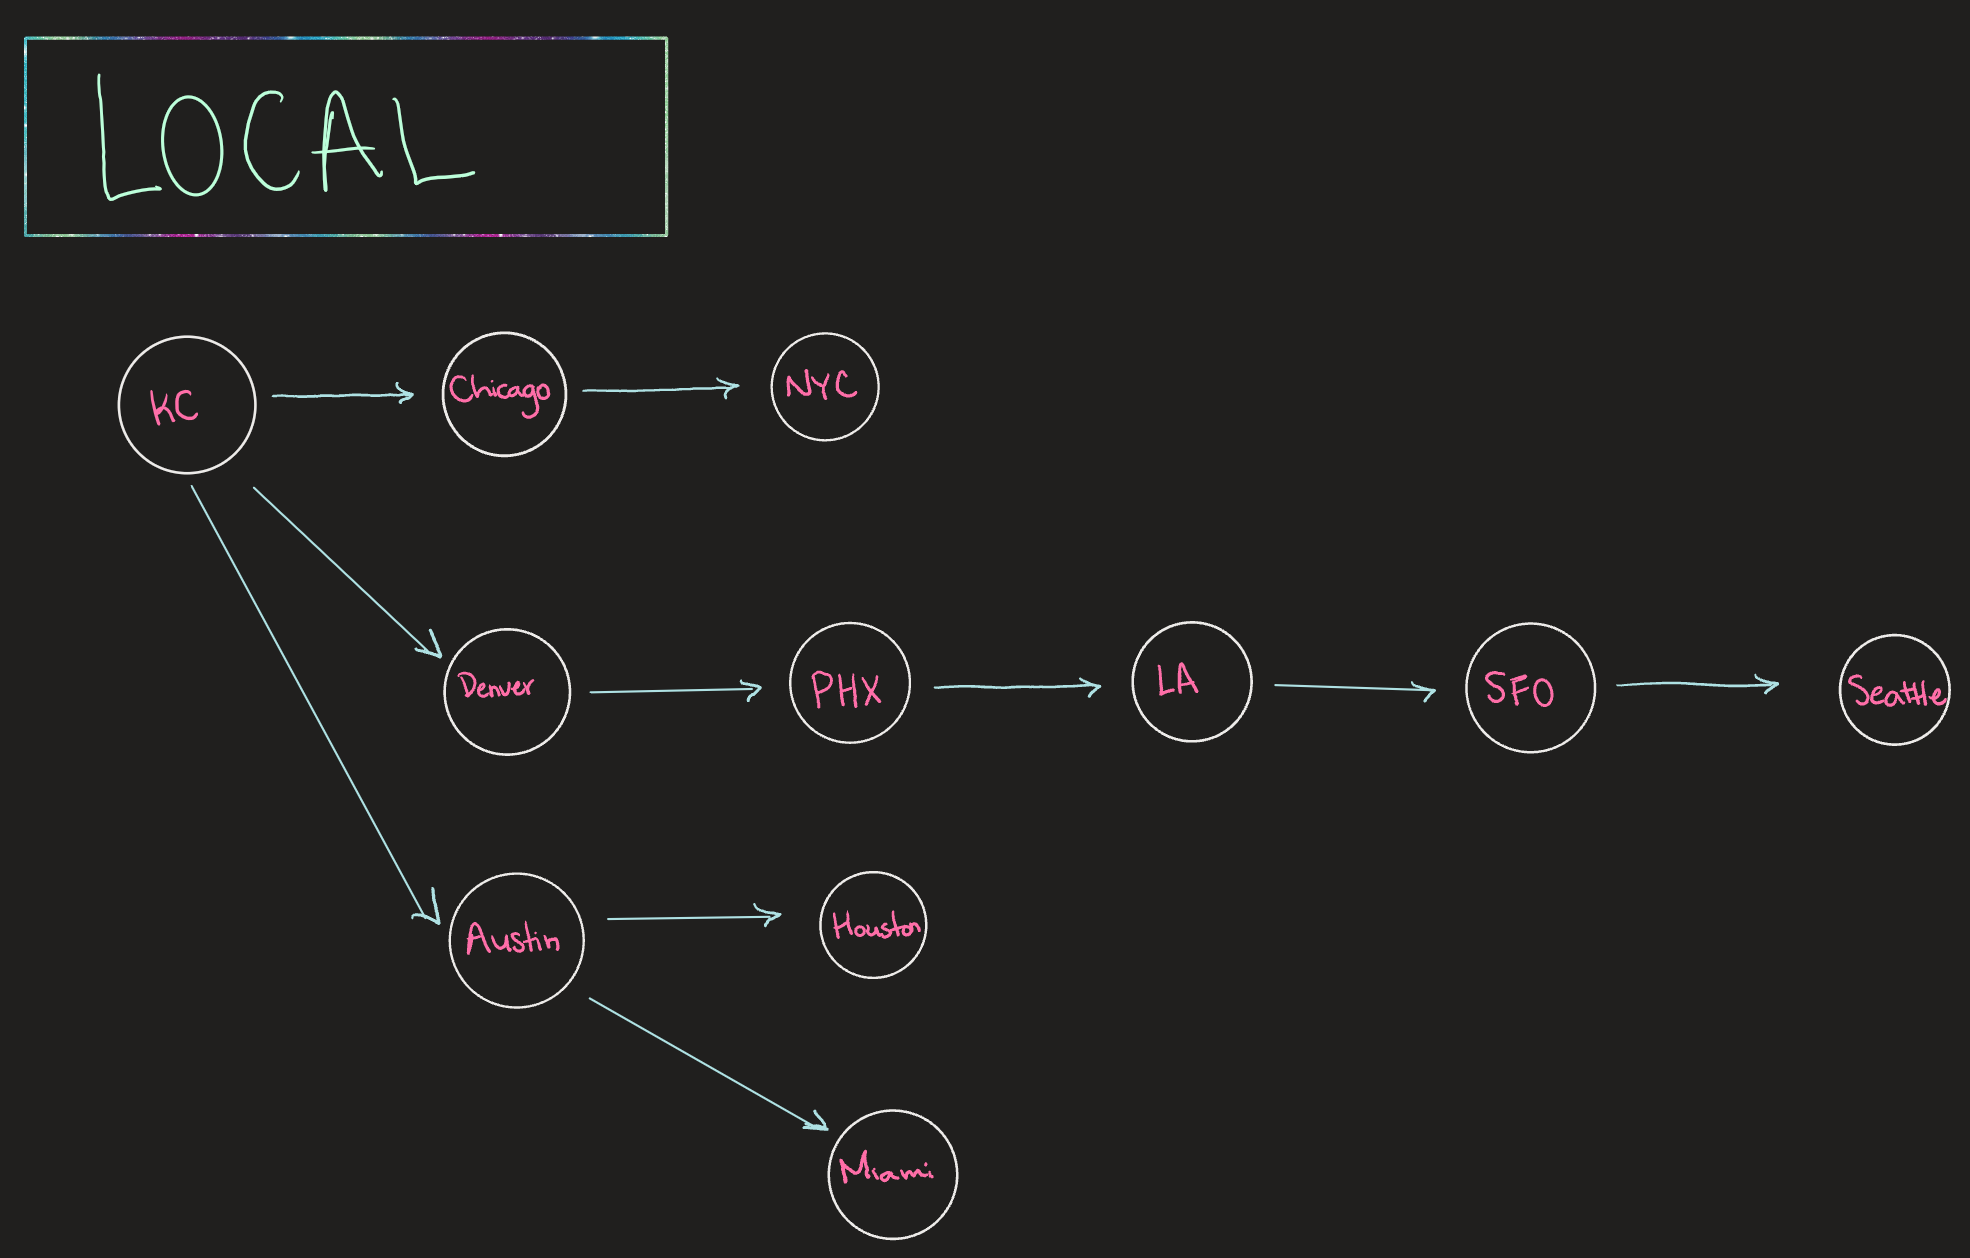

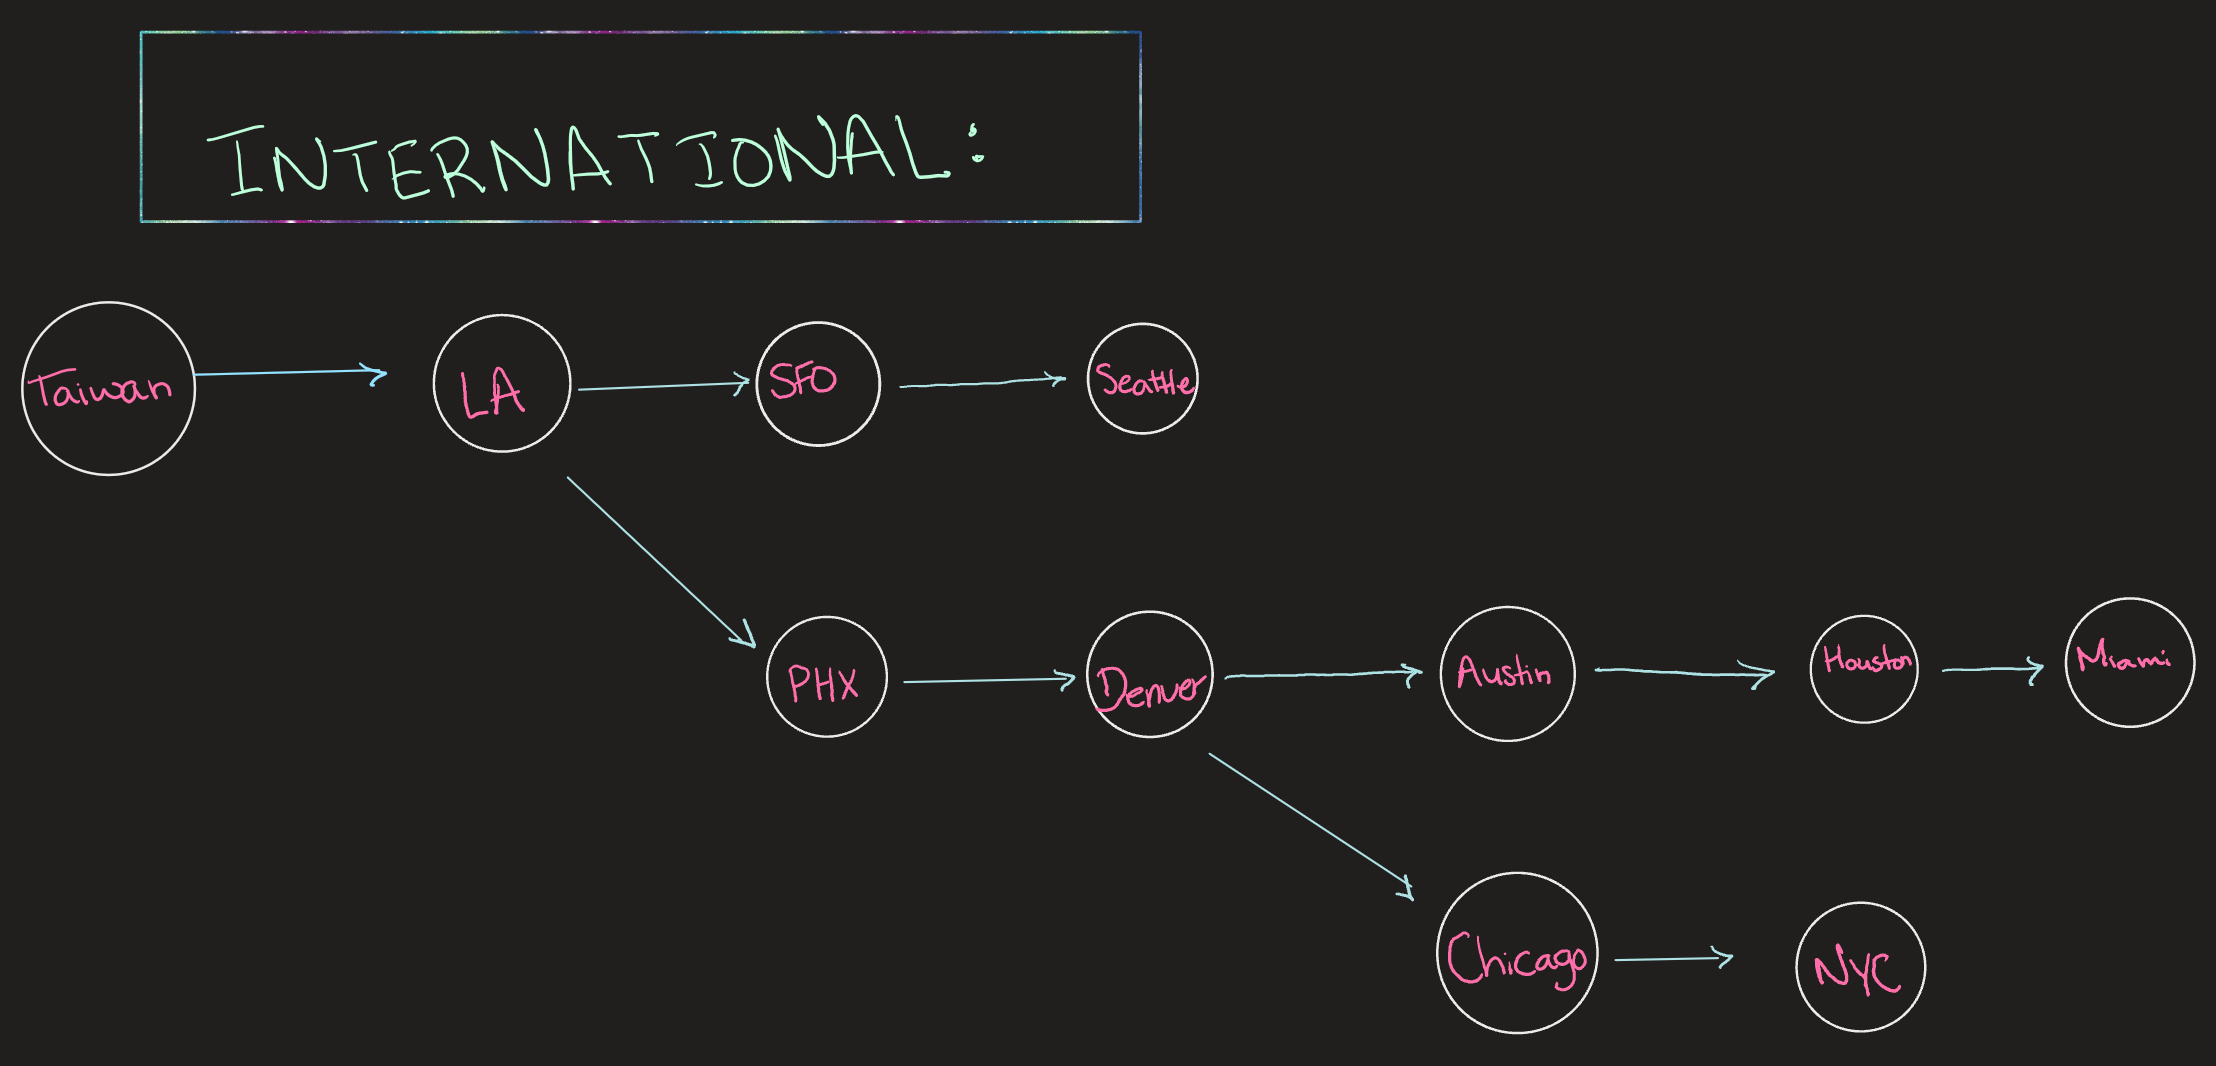

In [ ]:
from pandas import *

# We first create a dictionary called Node_dict for the Nodes with 'Node', 'Supply', and 'Demand' as keys and the associated data as values.

Node_dict = {
    'Node': ['Kansas City', 'Taiwan', 'Chicago', 'Denver', 'Austin', 'NYC', 'Phoenix', 'Houston', 'Miami', 'LA', 'SFO', 'Seattle'],
    'Supply': [15000, 50000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Demand': [0, 0, 2400, 2400, 2200, 3300, 2700, 3000, 6200, 20000, 15000, 4300]
}

Node_df = DataFrame(Node_dict)

Node_df = Node_df.set_index('Node')

Node_df.head(20)

,Supply,Demand
Node,,
Kansas City,15000,0
Taiwan,50000,0
Chicago,0,2400
Denver,0,2400
Austin,0,2200
NYC,0,3300
Phoenix,0,2700
Houston,0,3000
Miami,0,6200


In [ ]:
# Local Network

Arc_df_local = pd.DataFrame({
    'Origin': ['Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City'],
    'Destination': ['Chicago', 'Denver', 'Austin', 'NYC', 'Phoenix', 'LA', 'SFO', 'Seattle', 'Miami', 'Houston'],
    'Distance': [510, 603, 700, 1192, 1210, 1622, 1807, 1837, 1462, 743]
})

# Displaying the Arc_df dataframe

Arc_df_local.head(25)

,Origin,Destination,Distance
0,Kansas City,Chicago,510
1,Kansas City,Denver,603
2,Kansas City,Austin,700
3,Kansas City,NYC,1192
4,Kansas City,Phoenix,1210
5,Kansas City,LA,1622
6,Kansas City,SFO,1807
7,Kansas City,Seattle,1837
8,Kansas City,Miami,1462
9,Kansas City,Houston,743


In [ ]:
# International Network

Arc_df_international = pd.DataFrame({
    'Origin': ['Taiwan', 'LA', 'LA', 'LA', 'LA', 'LA', 'LA', 'LA', 'LA', 'LA'],
    'Destination': ['LA', 'SFO', 'Phoenix', 'Seattle', 'Denver', 'Austin', 'Houston', 'Miami', 'Chicago', 'NYC'],
    'Distance': [0, 382, 373, 1135, 1017, 1378, 1548, 2734, 2017, 2790]
})

# Displaying the Arc_df_international dataframe

Arc_df_international.head(25)

,Origin,Destination,Distance
0,Taiwan,LA,0
1,LA,SFO,382
2,LA,Phoenix,373
3,LA,Seattle,1135
4,LA,Denver,1017
5,LA,Austin,1378
6,LA,Houston,1548
7,LA,Miami,2734
8,LA,Chicago,2017
9,LA,NYC,2790


In [ ]:
import pandas as pd
from pulp import *

# The displayed node tables above are repeated here for convenience purposes

# Defining Node data
Node_dict = {
    'Node': ['Kansas City', 'Taiwan', 'Chicago', 'Denver', 'Austin', 'NYC', 'Phoenix', 'Houston', 'Miami', 'LA', 'SFO', 'Seattle'],
    'Supply': [15000, 50000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Demand': [0, 0, 2400, 2400, 2200, 3300, 2700, 3000, 6200, 20000, 15000, 4300]
}

# Creating Node DataFrame
Node_df = pd.DataFrame(Node_dict).set_index('Node')

# Defining Arc data (distances) for local and international transporation
Arc_df_local = pd.DataFrame({
    'Origin': ['Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City', 'Kansas City'],
    'Destination': ['Chicago', 'Denver', 'Austin', 'NYC', 'Phoenix', 'LA', 'SFO', 'Seattle', 'Miami', 'Houston'],
    'Distance': [510, 603, 700, 1192, 1210, 1622, 1807, 1837, 1462, 743]
})
Arc_df_international = pd.DataFrame({
    'Origin': ['Taiwan', 'LA', 'LA', 'LA', 'LA', 'LA', 'LA', 'LA', 'LA', 'LA'],
    'Destination': ['LA', 'SFO', 'Phoenix', 'Seattle', 'Denver', 'Austin', 'Houston', 'Miami', 'Chicago', 'NYC'],
    'Distance': [0, 382, 373, 1135, 1017, 1378, 1548, 2734, 2017, 2790]
})

# Create the model
model = LpProblem("Truck_Allocation_Optimization", LpMaximize)

# Decision variables for local, international and excesss trucksin each location
Li = LpVariable.dicts("Local_Trucks", [(row['Origin'], row['Destination']) for index, row in Arc_df_local.iterrows()], lowBound=0, upBound= None, cat='Continuous')
Ii = LpVariable.dicts("International_Trucks", [(row['Origin'], row['Destination']) for index, row in Arc_df_international.iterrows()], lowBound=0, upBound= None, cat='Continuous')
excess_trucks = LpVariable.dicts("Excess_Trucks", Node_df.index, lowBound=0, cat='Continuous')

# Decision variable for holding days (for each node)
Hd = LpVariable.dicts("Holding_Days", Node_df.index, lowBound=30, upBound=45, cat='Continuous')

# Revenue

# Calculate Total Demand
total_demand = sum(Node_df['Demand'])

# Revenue Calculation
revenue = 60000 * total_demand


# Production cost

# Constants for cost per truck
cost_per_truck_KC = 55000
cost_per_truck_Taiwan = 50000
trucks_from_KC = 11500
trucks_from_Taiwan = 50000

production_cost = (cost_per_truck_KC * trucks_from_KC) + (cost_per_truck_Taiwan * trucks_from_Taiwan)


# Transportation costs
transportation_cost_local = 1.15 * pulp.lpSum([Li[(o, d)] * Arc_df_local[(Arc_df_local['Origin'] == o) & (Arc_df_local['Destination'] == d)]['Distance'].values[0]
                                               if (o, d) in Li else 0
                                               for o, d in Li])
transportation_cost_international = 1.15 * pulp.lpSum([Ii[(o, d)] * Arc_df_international[(Arc_df_international['Origin'] == o) & (Arc_df_international['Destination'] == d)]['Distance'].values[0]
                                                       if (o, d) in Ii else 0
                                                       for o, d in Ii])

total_transportation_cost = transportation_cost_local + transportation_cost_international

# Excess trucks at each node
for node in Node_df.index:
    model += excess_trucks[node] >= lpSum([Li[(o, node)] if (o, node) in Li else 0 +
                                          Ii[(o, node)] if (o, node) in Ii else 0
                                          for o in Node_df.index]) - Node_df.loc[node, 'Demand']

# Defining holding costs using a fixed representative day within the range
min_holding_cost = 37 * 30 * lpSum([excess_trucks[node] for node in Node_df.index])
max_holding_cost = 37 * 45 * lpSum([excess_trucks[node] for node in Node_df.index])
average_holding_cost = (min_holding_cost + max_holding_cost) / 2


# Objective function
model += revenue - production_cost - transportation_cost_local - transportation_cost_international - average_holding_cost, "Total_Profit"

# Constraints

# Demand Constraint
## Ensuring demand is met at each node
for node in Node_df.index:
    model += pulp.lpSum([
        Li[(o, node)] if (o, node) in Li else 0 +
        Ii[(o, node)] if (o, node) in Ii else 0
        for o in Node_df.index]) == Node_df.loc[node, 'Demand'], f"Demand_{node}"

# Supply Constraint

## Constraint for the total local trucks from Kansas City
kansas_city_trucks = pulp.lpSum([Li[(o, d)] for (o, d) in Li if o == 'Kansas City'])
model += kansas_city_trucks <= Node_df.loc['Kansas City', 'Supply'], "Kansas_City_Local_Supply_Limit"

## Constraint for the total international trucks from Taiwan
taiwan_trucks = pulp.lpSum([Ii[(o, d)] for (o, d) in Ii if o == 'Taiwan'])
model += taiwan_trucks <= Node_df.loc['Taiwan', 'Supply'], "Taiwan_International_Supply_Limit"


# We decided to have separate constraint for supply because upper bound in Li and Ii decision variables would only limit number of cars
# that can be transported from local or international factories

# Solve the model
model.solve()

# Display results
print("Status:", LpStatus[model.status])
print()
print("Objective = ", value(model.objective))

print()
calculated_profit = value(model.objective)
calculated_revenue = value(revenue)
calculated_production_cost = value(production_cost)
calculated_transportation_cost = value(total_transportation_cost)
calculated_average_holding_cost = value(average_holding_cost)

print("Total Profit: ${:,.2f}".format(calculated_profit))
print()
print("Total Revenue: ${:,.2f}".format(calculated_revenue))
print()
print("Total Production Cost: ${:,.2f}".format(calculated_production_cost))
print()
print("Total Transportation Cost: ${:,.2f}".format(calculated_transportation_cost))
print()
print("Average Holding Cost: ${:,.2f}".format(calculated_average_holding_cost))

print()
print()
print("Local Factory:")
print()
for (o, d), var in Li.items():
    if var.varValue > 0:
        print(f"Local Trucks from {o} to {d}: {var.varValue}")
print()
print()
print("International Factory:")
print()
for (o, d), var in Ii.items():
    if var.varValue > 0:
        print(f"International Trucks from {o} to {d}: {var.varValue}")


Status: Optimal

Objective =  519005820.0

Total Profit: $519,005,820.00

Total Revenue: $3,690,000,000.00

Total Production Cost: $3,132,500,000.00

Total Transportation Cost: $38,494,180.00

Average Holding Cost: $0.00


Local Factory:

Local Trucks from Kansas City to Chicago: 2400.0
Local Trucks from Kansas City to Austin: 100.0
Local Trucks from Kansas City to NYC: 3300.0
Local Trucks from Kansas City to Miami: 6200.0
Local Trucks from Kansas City to Houston: 3000.0


International Factory:

International Trucks from Taiwan to LA: 20000.0
International Trucks from LA to SFO: 15000.0
International Trucks from LA to Phoenix: 2700.0
International Trucks from LA to Seattle: 4300.0
International Trucks from LA to Denver: 2400.0
International Trucks from LA to Austin: 2100.0


In [ ]:
print(model)

Truck_Allocation_Optimization:
MAXIMIZE
-1387.5*Excess_Trucks_Austin + -1387.5*Excess_Trucks_Chicago + -1387.5*Excess_Trucks_Denver + -1387.5*Excess_Trucks_Houston + -1387.5*Excess_Trucks_Kansas_City + -1387.5*Excess_Trucks_LA + -1387.5*Excess_Trucks_Miami + -1387.5*Excess_Trucks_NYC + -1387.5*Excess_Trucks_Phoenix + -1387.5*Excess_Trucks_SFO + -1387.5*Excess_Trucks_Seattle + -1387.5*Excess_Trucks_Taiwan + -1584.6999999999998*International_Trucks_('LA',_'Austin') + -2319.5499999999997*International_Trucks_('LA',_'Chicago') + -1169.55*International_Trucks_('LA',_'Denver') + -1780.1999999999998*International_Trucks_('LA',_'Houston') + -3144.1*International_Trucks_('LA',_'Miami') + -3208.4999999999995*International_Trucks_('LA',_'NYC') + -428.95*International_Trucks_('LA',_'Phoenix') + -439.29999999999995*International_Trucks_('LA',_'SFO') + -1305.25*International_Trucks_('LA',_'Seattle') + -804.9999999999999*Local_Trucks_('Kansas_City',_'Austin') + -586.5*Local_Trucks_('Kansas_City',_'Ch